In [71]:
import glob 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord, match_coordinates_sky
from astropy import units as u

# Doesn't seem like there are dupes in topcat 
df = pd.read_csv('C:/Projects/0_Data/SUMS_CompleteCatalog/MaskedSources/topcat_masked_sources.csv').reset_index(drop=True)

# Lets do matches within half an arcsecond 
df = df[df.angDist<0.5].reset_index(drop=True)

# If multiple things got assigned the same simbad source, take the closest 
rows = []
for ind, row in df.iterrows():
    group = df[df.main_id == row.main_id]
    if len(group) > 1:
        best = group[group.angDist == group.angDist.min()]
    else:
        best = group
    rows.append(best)

df = pd.concat(rows).reset_index(drop=True)
# Sp Type 
sum_sptype = 0 
for typesp in ['O','B','A','F','G','K','M','W','L','s']:
    print(f'{typesp} type: ', df.sp_type.str.startswith(typesp).sum())
    sum_sptype += df.sp_type.str.startswith(typesp).sum()
print('Total: ', df.shape[0])
print('Classified: ', sum_sptype)
sum_nan = df.sp_type.isna().sum()
print('NaN: ', sum_nan)
print('Remaining: ',df.shape[0] - sum_sptype - sum_nan)

print(df.shape)


O type:  329
B type:  438
A type:  34
F type:  50
G type:  19
K type:  10
M type:  3
W type:  33
L type:  1
s type:  2
Total:  1220
Classified:  919
NaN:  301
Remaining:  0
(1220, 47)


In [73]:
df.sp_type.fillna('none', inplace=True)
df.loc[df.sp_type.str.startswith('s'),'sp_type']

418      sdOB
433    sdB+dM
Name: sp_type, dtype: object

(94, 47)


Text(0, 0.5, 'N')

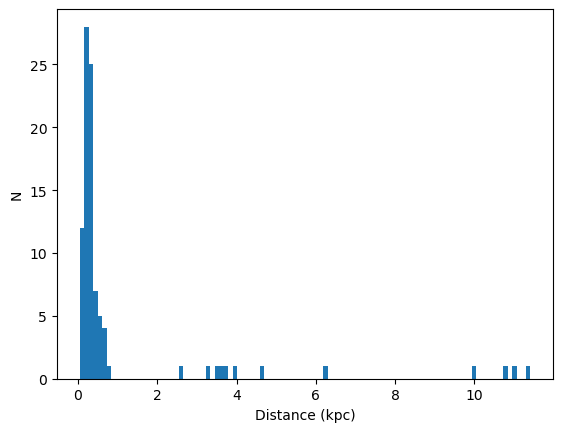

In [74]:
df2 = df[df.plx > 4* df.plx_err].copy().reset_index(drop=True)
print(df2.shape)
dist = 1 / df2.plx
plt.hist(dist, bins=100);
plt.xlabel('Distance (kpc)')
plt.ylabel('N')

(6.0, 21.0)

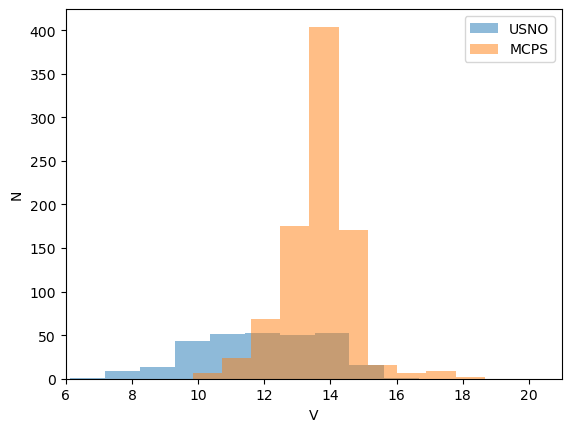

In [78]:
plt.hist(df.loc[df.cat=='USNO','V'],alpha=0.5,label='USNO')
plt.hist(df.loc[df.cat=='MCPS','V'],alpha=0.5,label='MCPS')
plt.legend()
plt.xlabel('V')
plt.ylabel('N')
plt.xlim(6,21)

Text(0, 0.5, 'N')

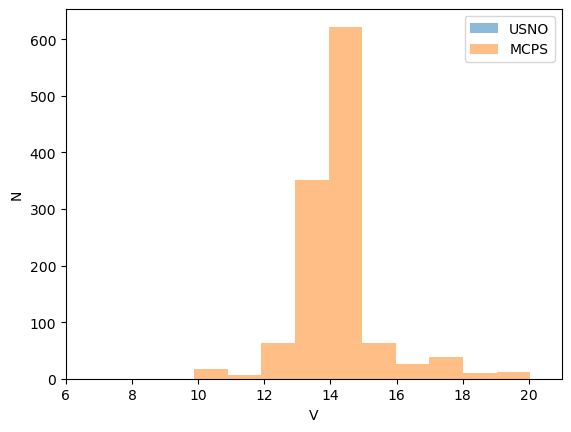

In [77]:
df2 = pd.read_csv('C:/Projects/0_Data/SUMS_CompleteCatalog/MaskedSources/topcat_step5_masked_sources.csv').reset_index(drop=True)
plt.hist(df2.loc[df2.cat=='USNO','V'],alpha=0.5,label='USNO')
plt.hist(df2.loc[df2.cat=='MCPS','V'],alpha=0.5,label='MCPS')
plt.xlim(6,21)
plt.legend()
plt.xlabel('V')
plt.ylabel('N')